In [1]:
import sklearn
from sklearn import tree

In [2]:
# define features and labels
features = [[140,1],[130,1],[160,0],[170,0]]
labels = [0,0,1,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,labels)
print (clf.predict([[160,0]]))

[1]


In [3]:
# Iris flower dataset classifier
import graphviz
from sklearn.datasets import load_iris
iris = load_iris()
print (iris.feature_names)
print (iris.target_names)
print (iris.feature_names[0])
print (iris.target_names[0])
print (iris.data[0])
print (iris.target[0])

#for i in range(len(iris.target)):
for i in range(5):
    print ("Example %d: label %s, feature %s" % (i, iris.target[i],iris.data[i]))


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
sepal length (cm)
setosa
[5.1 3.5 1.4 0.2]
0
Example 0: label 0, feature [5.1 3.5 1.4 0.2]
Example 1: label 0, feature [4.9 3.  1.4 0.2]
Example 2: label 0, feature [4.7 3.2 1.3 0.2]
Example 3: label 0, feature [4.6 3.1 1.5 0.2]
Example 4: label 0, feature [5.  3.6 1.4 0.2]


In [52]:
    
# import the libraries: numpy and sklearn, and its dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

# load the iris dataset from scikit
iris = load_iris()
test_idx = [0,50,100]

# create training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# create test data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# train the classifier
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

# predict label for new flower based on the classifier
print (test_target)
print (clf.predict(test_data))


[0 1 2]
[0 1 2]


In [53]:
# visualization of the tree

from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("iris.pdf")

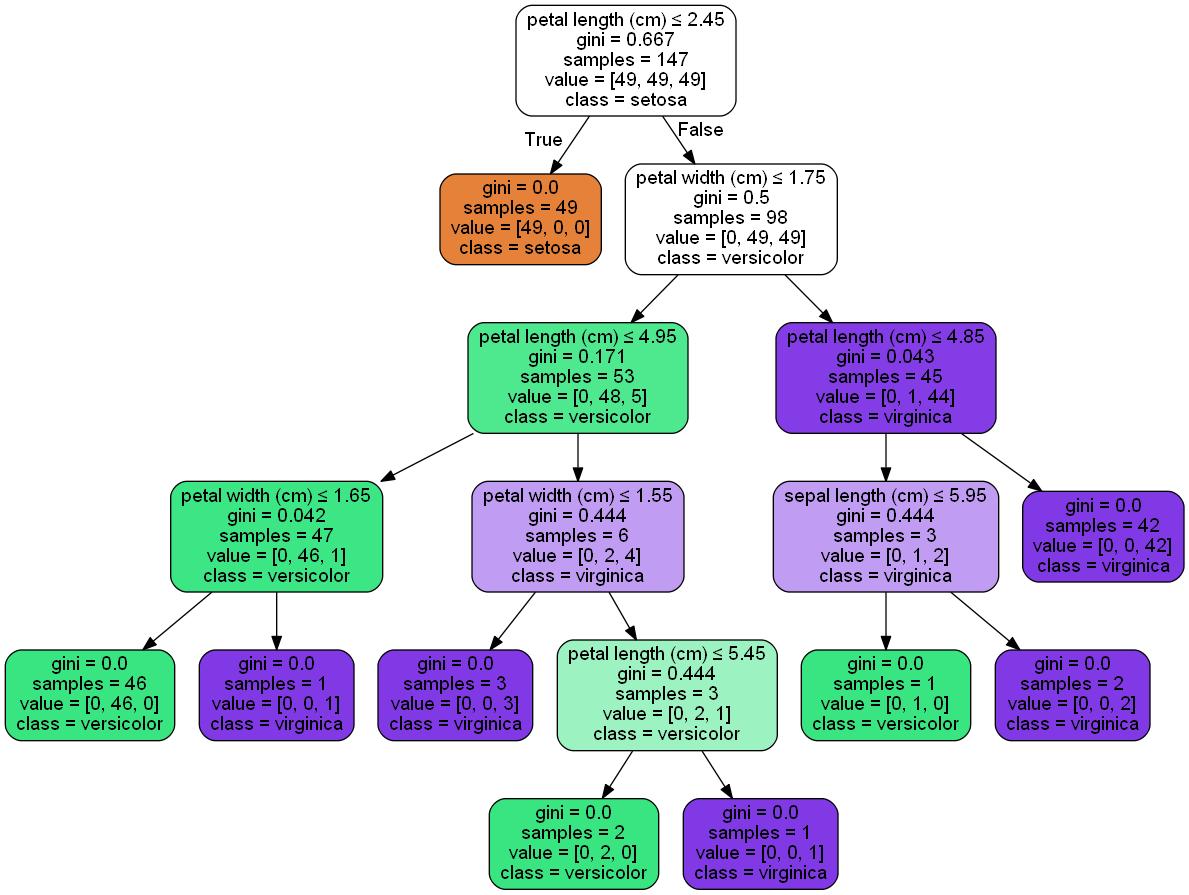

In [55]:
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [ ]:
def iris_classification():
    
    # import the libraries: numpy and sklearn, and its dataset
    import numpy as np
    from sklearn.datasets import load_iris
    from sklearn import tree

    # load the iris dataset from scikit
    iris = load_iris()
    test_idx = [0,50,100]

    # create training data
    train_target = np.delete(iris.target, test_idx)
    train_data = np.delete(iris.data, test_idx, axis=0)

    # create test data
    test_target = iris.target[test_idx]
    test_data = iris.data[test_idx]

    # train the classifier
    clf = tree.DecisionTreeClassifier()
    clf.fit(train_data, train_target)

    # predict label for new flower based on the classifier
    print (test_target)
    print (clf.predict(test_data))

    for i in range(3):
        print("\n")
        print(iris.feature_names,iris.target_names)
        print(test_data[i], test_target[i])

In [56]:
iris_classification()

[0 1 2]
[0 1 2]


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2] 0


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[7.  3.2 4.7 1.4] 1


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[6.3 3.3 6.  2.5] 2


In [7]:
#iris dataset as pipeline

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.5)

#from sklearn import tree
#my_classifier = tree.DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
print (predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


[0 2 2 0 1 2 1 0 1 1 1 2 2 0 2 1 0 1 1 0 2 0 2 1 2 2 0 0 0 1 2 2 0 1 2 2 2
 2 1 1 1 1 2 1 0 0 0 2 1 2 2 2 1 2 0 2 2 1 2 1 0 2 1 0 0 2 1 1 1 0 0 0 1 2
 0]
0.96


In [23]:
#first classifier
##import random
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        
        for row in X_test:
            ##label = random.choice(self.y_train)
            label = self.closest(row)
            predictions.append(label)
            #print (predictions)
        return predictions
            
    def closest(self,row):
        best_dist = euc(row, X_train[0])
        best_index = 0
        for i in range(1,len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .5)

#from sklearn.neighbors import KNeighborsClassifier
#my_classifier = KNeighborsClassifier()

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)
#print(predictions)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))


0.9733333333333334
